In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 🧾1. Introduction
The online shopping behavior of prospective customers was examined as part of an assignment to help out the marketing arm of a startup. The goal was to analyze November and December customer sessions, the biggest shopping months, and answer the following questions:

- How do the purchase rates of new customers differ from those of returning customers?
- Which interactions with pages correlate the most in terms of time spent on them?
- What would be the chance of getting to 100 sales out of 500 sessions if a new campaign increases the return customer purchase rate by 15%?

This analysis adds follow to the marketing operations plan for forecasting Hollywood success in next holiday seasons.


In [4]:
import pandas as pd

# Load and preview data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


### 📦 2.Loading and Previewing the Data
First, I loaded the dataset and previewed the structure to understand the columns and types of variables.


This collection of data consists of the behavior of visitors to an online shopping site during particular online shopping sessions. This research was conducted over the span of one year, gathering information that includes:

👤 Customer activity - describes what type of website pages users have visited (account, info, product).

⏱️ Time spent  - seconds each user spent on each page type before leaving the site.

📉 Engagement metrics - Bounce rates, exit rates, page value.

📅 Timing - Month of session - weekend.

🔁 Customer type - New vs. returning customers.

💳 Purchase - Binary label for that session purchase exhibit: 0 or 1. 


📅 3. Filtering for November and December
Since we’re focusing on holiday shopping trends, I filtered the data to include only November and December.


Nov    2861
Dec    1589
Name: Month, dtype: int64


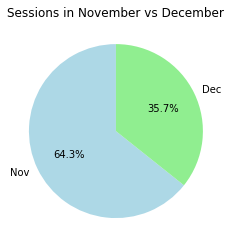

In [9]:
# Subset data for Nov and Dec
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Check months present
print(shopping_Nov_Dec['Month'].value_counts())

# Visual: Pie chart of session distribution
shopping_Nov_Dec['Month'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title("Sessions in November vs December")
plt.ylabel("")  # Hide y-label
plt.show()

### 🛍️ 4. Purchase Rates: New vs Returning Customers

In [10]:
# Count sessions by type and purchase
session_counts = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()

# Extract required numbers
total_new = np.sum(session_counts['New_Customer'])
total_returning = np.sum(session_counts['Returning_Customer'])
purch_new = session_counts[('New_Customer', 1)]
purch_returning = session_counts[('Returning_Customer', 1)]

# Calculate rates
rate_new = purch_new / total_new
rate_returning = purch_returning / total_returning
purchase_rates = {"Returning_Customer": rate_returning, "New_Customer": rate_new}
print(purchase_rates)


{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


I compared purchase rates between new and returning customers during November and December. Surprisingly, new customers had a higher purchase rate than returning ones.

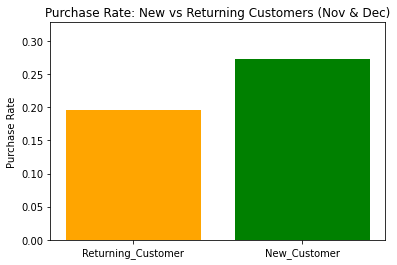

In [11]:
labels = list(purchase_rates.keys())
values = list(purchase_rates.values())

plt.bar(labels, values, color=["orange", "green"])
plt.ylabel("Purchase Rate")
plt.title("Purchase Rate: New vs Returning Customers (Nov & Dec)")
plt.ylim(0, max(values)*1.2)
plt.show()


### 🔍 5. Correlation of Time Spent on Page Types

Next, I checked how strongly time spent on different types of pages are correlated. The strongest correlation was between __Administrative_Duration__ and __ProductRelated_Duration__, indicating that customers who explore their account also spend time on products.

In [12]:
# Select duration columns
duration_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Correlation matrix
corr_matrix = shopping_Nov_Dec[duration_cols].corr()
print(corr_matrix)


                         Administrative_Duration  Informational_Duration  \
Administrative_Duration                 1.000000                0.244689   
Informational_Duration                  0.244689                1.000000   
ProductRelated_Duration                 0.389855                0.367126   

                         ProductRelated_Duration  
Administrative_Duration                 0.389855  
Informational_Duration                  0.367126  
ProductRelated_Duration                 1.000000  


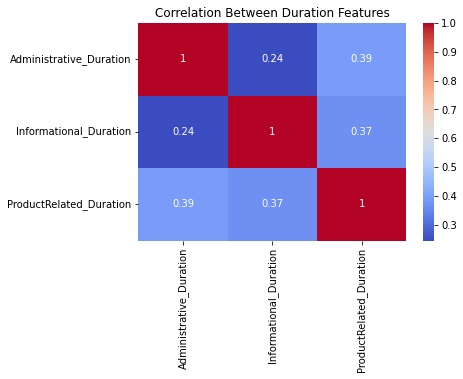

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Duration Features")
plt.show()


In [24]:
cor_admin_product = corr_matrix.loc['Administrative_Duration', 'ProductRelated_Duration']
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
#print(top_correlation)

print("the top correlation was among:", top_correlation )

the top correlation was among: {'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.38985460032069696}


### 📈 6. Estimating Campaign Success (Binomial Probability)

This analysis provided three key takeaways:

- New customers currently have a higher purchase rate than returning ones during Nov-Dec.
- Time spent on administrative and product-related pages is strongly correlated.
- A modest campaign improvement (15%) can significantly raise the chance of hitting sales goals.

These insights can help target future campaigns more effectively.


In [25]:
# Boosted rate
boosted_rate = 1.15 * rate_returning
print("Boosted purchase rate:", boosted_rate)

# Binomial probability
prob_less_than_100 = stats.binom.cdf(k=99, n=500, p=boosted_rate)
prob_at_least_100 = 1 - prob_less_than_100
print("Probability of at least 100 sales:", round(prob_at_least_100, 3))

Boosted purchase rate: 0.22493283181085436
Probability of at least 100 sales: 0.919


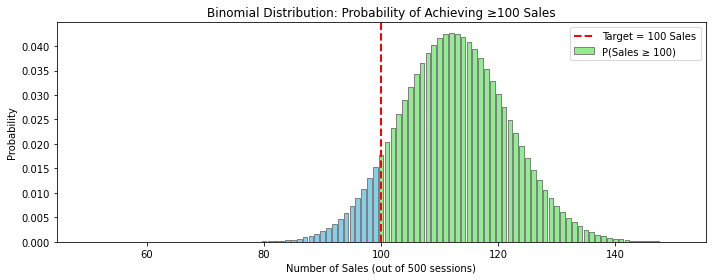

In [34]:
from matplotlib import patches

# Focused k values
k_vals = np.arange(500)
binom_probs = stats.binom.pmf(k_vals, 500, boosted_rate)

# Define the zoom range
zoom_range = (k_vals >= 50) & (k_vals <= 150)
success_range = (k_vals >= 100) & (k_vals <= 150)

plt.figure(figsize=(10, 4))

# Plot full bar chart in light blue
plt.bar(k_vals[zoom_range], np.array(binom_probs)[zoom_range], color='skyblue', edgecolor='gray')

# Shade area where sales ≥ 100 (success)
plt.bar(k_vals[success_range], np.array(binom_probs)[success_range], color='lightgreen', edgecolor='gray', label='P(Sales ≥ 100)')

# Add red dashed line at 100
plt.axvline(100, color='red', linestyle='dashed', linewidth=2, label='Target = 100 Sales')

# Labels & Title
plt.title("Binomial Distribution: Probability of Achieving ≥100 Sales")
plt.xlabel("Number of Sales (out of 500 sessions)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()



📌 Summary: We modeled the number of purchases generated during 500 customer sessions over a binomial distribution after applying a 15% boost in the rate of purchase with our planned marketing campaign.


### Key takeaways
This analysis showed three key takeaways:

✅ Key Insights: The probability of getting a minimum of 100 purchases out of these 500 sessions is a very high probability as seen by the larger green area on the chart.

This means that the marketing campaign can be viewed as having a statistical likelihood of success provided the 15% increase in purchase rate stands up.

- New customers currently have a higher purchase rate during Nov-Dec than returning ones.
- Time spent administrating and viewing products has a strong correlation.
- An increase of 15% in an average campaign would greatly improve chances of meeting sales objectives.

Such insights will help in targeting future campaigns.
